In [1]:
# %pip install scipy
# %pip install matplotlib
# %pip install SpeechRecognition
# %pip install wave

Conversão para .WAV

In [2]:
# # import required modules
# import subprocess

# # convert to wav file
# subprocess.call(['ffmpeg', '-i', 'racionais.mp3',
#                  'racionais.wav'])

Conversão audios estereos para mono

Text(0, 0.5, 'Amplitute')

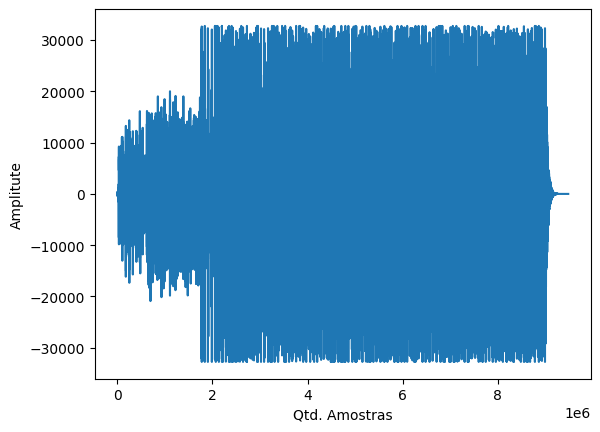

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile as wav

rate, data = wav.read('dido2.wav')

# somando os dois canais e normalizando (passando de estereo para mono)
data = np.sum(data, axis=1) / 2 
plt.plot(data)
plt.xlabel('Qtd. Amostras')
plt.ylabel('Amplitute')

Converter qtd. amostra para tempo (Eixo X)

Text(0, 0.5, 'Amplitute')

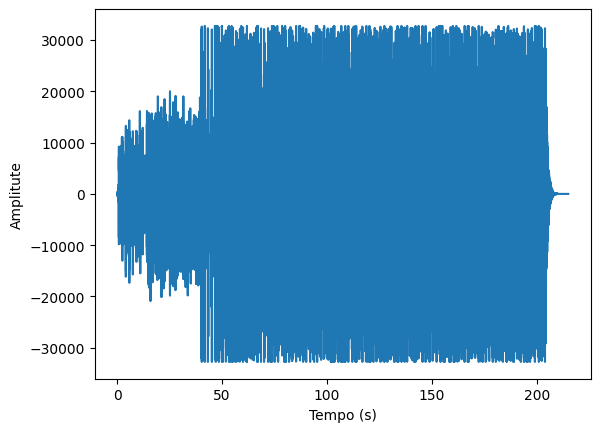

In [4]:
# encontrar o comprimento (total de amostras)
n = len(data)

# Frequencia de amostragem por sinal (quantas amostras por segundo)
fs = 44100 #48khz (audio) ou 44100 44.1khz (padrao spotify apple music) 
# https://emastered.com/pt/blog/sample-rate-for-audio#:~:text=A%20melhor%20taxa%20de%20amostragem,da%20sua%20onda%20sonora%20original.


T = 1/fs # tempo entre uma amostra e outra (inverso entre uma amostra e outra)

t = np.arange(0,n/fs,T) # (vetor de tempo) começa em 0seg, vai até o valor final do comprimento / frequencia de amostragem, e vai andando de T em T (valor calculado na variavel T)

plt.plot(t, data)
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitute')

Transformada de Fourier

4741367

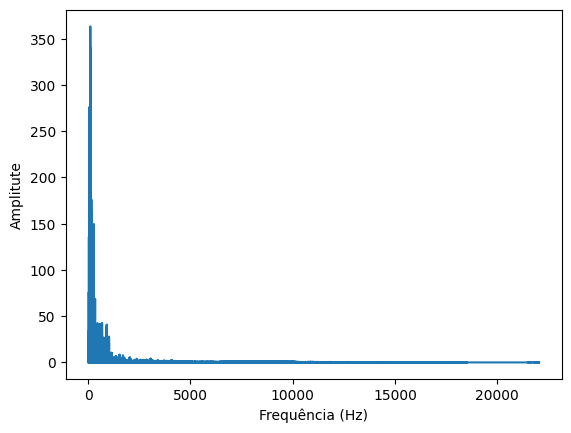

In [10]:
from scipy.fft import fft, fftfreq
import numpy as np
import matplotlib.pyplot as plt

# saindo de segundos e indo para hz
f = fftfreq(n,T)

# numero complexo (transformada)
transf = fft(data)

# módulo - para tirar os números complexos (módulo)
transf = np.abs(transf)

plt.plot(f[f > 0],transf[f > 0]*1/n) # mascara para pegar apenas os sinais com frequencias maiores que zeros e normalização o eixo vertical (dividir a transformada pelo tamanho do sinal)
plt.xlabel('Frequência (Hz)')
plt.ylabel('Amplitute')


# plt.ylim([0, 50])
# plt.xlim([0, 30])
len(transf[f > 0]*1/n)


In [9]:
import pandas as pd

df_transf = pd.DataFrame(transf[f > 0]*1/n)
df_transf.columns = ['Amplitude']
df_valores = pd.DataFrame()

cont = 0
hashtags = []
f_hashtag = ''

for i in range(0, int(df_transf['Amplitude'].max()) + 100, 10) :
   cont = 0
   for j in df_transf['Amplitude']:
      if j > i :  
         cont+=1
   # print(f'Número de valores de Amplitude maiores que {i} e menores que {i+100}: {cont}')
   if (cont > 0):
      hashtag = f"{i}{i+100}{cont}"
      hashtags.append(hashtag)
   
f_hashtag = ' '.join(hashtags)

print(f'Hashtag para essa música: {f_hashtag}')


Hashtag para essa música: 01004741367 1011031989 2012010625 301305015 401402838 501501741 601601145 70170794 80180544 90190387 100200283 110210223 120220168 130230133 140240111 15025086 16026058 17027047 18028035 19029029 20030024 21031022 22032020 23033017 24034013 25035011 2603606 2703703 2803802 2903902 3004002 3104102 3204202 3304302 3404402 3504501 3604601


In [7]:
# chunksize = 1024 # tamanho que o array será dividido (cada chunk tem esse tamanho) 1024 elementos
# chunks = int(len(transf) / chunksize)
# result = []

# for j in range(chunks):
#     arraychunk = np.zeros(chunksize) # criação de novo array preenchido com zero
#     for i in range(chunksize):
#         arraychunk[i] = transf[(j * chunksize) + i] # mapeando a porção do array transf correspondente ao pedaço j no arraychunk
#     result.append(arraychunk)
# print(result[0][0])

In [8]:
ranges = np.arange(40, 301, 10)  # Intervalos de 10 em 10 Hz
fuzfactor = 1  # Fator de ajuste menor para mais precisão

# Inicialização dos highscores e points para os intervalos de interesse
highscores = [0] * len(ranges)
points = [0] * len(ranges)

# Processamento da transformada completa
for freq in range(40, 301):
    if transf[freq] > 0:
        mag = np.log(np.abs(transf[freq]) + 1)
        i = 0
        while i < len(ranges) and ranges[i] < freq:
            i += 1
        if i < len(ranges) and mag > highscores[i]:
            highscores[i] = mag
            points[i] = freq

# Cálculo da hashtag única com mais detalhes
h = 0
for i in range(len(points)):
    h += (points[i] - (points[i] % fuzfactor)) * (10 ** (len(points) - i - 1))

print(f"Hashtag: {h}")

# Extraindo os pontos individuais para leitura
h_copy = h
extracted_points = []

for i in range(len(points)):
    factor = 10 ** (len(points) - i - 1)
    point = (h_copy // factor) * fuzfactor
    extracted_points.append(point)
    h_copy %= factor

print(f"Frequencias: {extracted_points}")


Hashtag: 4492936881268530392979158291
Frequencias: [44, 9, 2, 9, 3, 6, 8, 8, 1, 2, 6, 8, 5, 3, 0, 3, 9, 2, 9, 7, 9, 1, 5, 8, 2, 9, 1]
